In [41]:
import numpy as np
np.set_printoptions(suppress= True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [7]:
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

df_cancer = pd.DataFrame(data =cancer.data,columns= cancer.feature_names)
df_cancer['target'] = pd.Series(cancer.target)


In [8]:
def logistic(z):
    return (1 + np.exp(-z))**(-1)

def standard_scaler(X):
    mean = X.mean(0)
    sd = X.std(0)
    return (X - mean)/sd 

In [17]:
class BinaryLogisticRegression:
    
    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False):
        
        ### Record Info ###
        if standardize:
            X = standard_scaler(X) 
        if not has_intercept:
            ones = np.ones(X.shape[0]).reshape(-1, 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.N, self.D = X.shape
        self.y = y
        self.n_iter = n_iter
        self.lr = lr
        beta = np.random.randn(self.D) #choose random value of X
        for i in range(n_iter):
            p = logistic(np.dot(self.X, beta))#calculate probalistics vectors
            gradeint = np.dot(self.X.T,(self.y -p)) #calculate gradient
            beta -= lr*beta
            
        self.beta_hat = beta
        self.p  = logistic(np.dot(self.X,beta))
        self.yhat = self.p.round() #calculate the estimate 
            
            

In [34]:
binary_model = BinaryLogisticRegression()
binary_model.fit(X, y, n_iter = 10**4, lr = 0.000001)
print('In-sample accuracy: '  + str(np.mean(binary_model.yhat == binary_model.y)))

In-sample accuracy: 0.8154657293497364


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


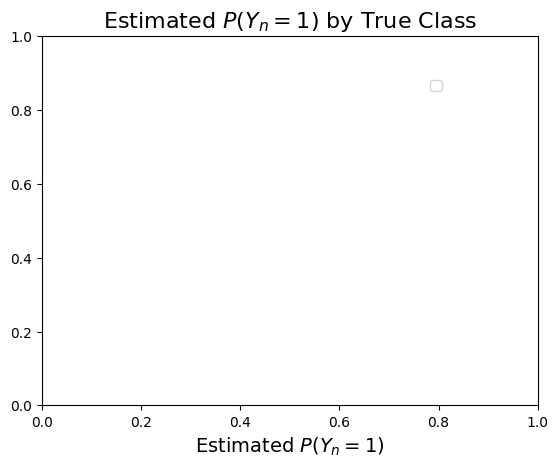

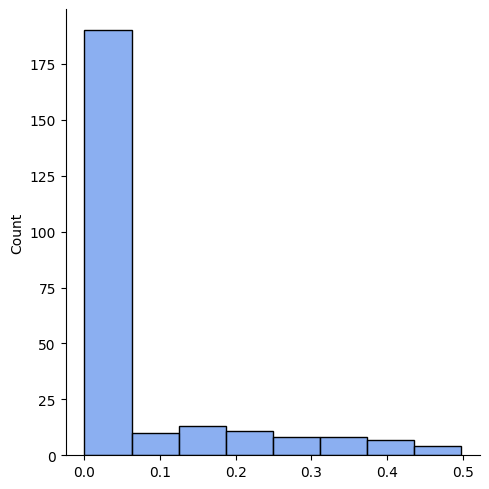

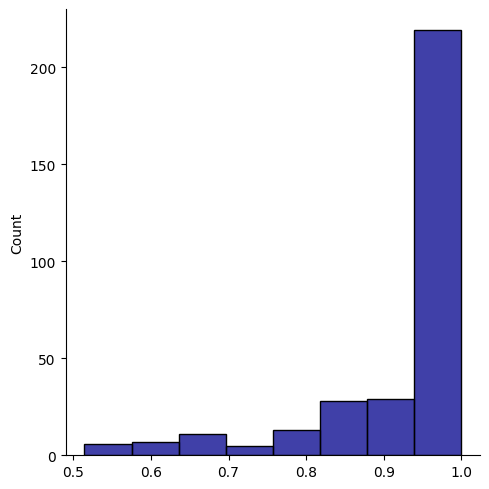

In [43]:
fig, ax =plt.subplots()
sns.displot(binary_model.p[binary_model.yhat == 0], kde = False, bins = 8, label = 'Class 0', color = 'cornflowerblue')
sns.displot(binary_model.p[binary_model.yhat == 1], kde = False, bins = 8, label = 'Class 1', color = 'darkblue')
ax.legend(loc = 9, bbox_to_anchor = (0,0,1.59,.9))
ax.set_xlabel(r'Estimated $P(Y_n = 1)$', size = 14)
ax.set_title(r'Estimated $P(Y_n = 1)$ by True Class', size = 16)
sns.despine()

In [47]:
wine = datasets.load_wine()
X = wine['data']
y = wine['target']

df_wine = pd.DataFrame(data=wine.data,columns= wine.feature_names)
df_wine['target'] = pd.Series(wine.target)

In [48]:
def softmax(z):
    return np.exp(z)/(np.exp(z).sum())

def softmax_byrow(Z):
    return (np.exp(Z)/(np.exp(Z).sum(1)[:,None]))

def make_I_matrix(y):
    I = np.zeros(shape = (len(y), len(np.unique(y))), dtype = int)
    for j, target in enumerate(np.unique(y)):
        I[:,j] = (y == target)
    return I


Z_test = np.array([[1, 1],
              [0,1]])
print('Softmax for Z:\n', softmax_byrow(Z_test).round(2))

y_test = np.array([0,0,1,1,2])
print('I matrix of [0,0,1,1,2]:\n', make_I_matrix(y_test), end = '\n\n')

Softmax for Z:
 [[0.5  0.5 ]
 [0.27 0.73]]
I matrix of [0,0,1,1,2]:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]



In [53]:
class MulticlassLogisticRegression:
    
    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False):
        
        ### Record Info ###
        if standardize:
            X = standard_scaler(X) 
        if not has_intercept:
            ones = np.ones(X.shape[0]).reshape(-1, 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.N, self.D = X.shape
        self.y = y
        self.K = len(np.unique(y))
        self.n_iter = n_iter
        self.lr = lr
        
        ### Fit B ###
        B = np.random.randn(self.D*self.K).reshape((self.D, self.K))
        self.I = make_I_matrix(self.y)
        for i in range(n_iter):
            Z = np.dot(self.X, B)
            P = softmax_byrow(Z)
            gradient = np.dot(self.X.T, self.I - P)
            B += lr*gradient
        
        ### Return Values ###
        self.B = B
        self.Z = np.dot(self.X, B)
        self.P = softmax_byrow(self.Z)
        self.yhat = self.P.argmax(1)

In [59]:
multiclass_model = MulticlassLogisticRegression()
multiclass_model.fit(X, y, 10**4, 0.0001)
print (multiclass_model.yhat)
print('In-sample accuracy: '  + str(np.mean(multiclass_model.yhat == y)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
In-sample accuracy: 1.0


In [60]:
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

def sign(a):
    return (-1)**(a < 0)

def to_binary(y):
        return y > 0 #defining a function

def standard_scaler(X):
    mean = X.mean(0)
    sd = X.std(0)
    return (X - mean)/sd

In [61]:
class Perceptron:

    def fit(self, X, y, n_iter = 10**3, lr = 0.001, add_intercept = True, standardize = True):
        
        # Add Info #
        if standardize:
            X = standard_scaler(X)
        if add_intercept:
            ones = np.ones(len(X)).reshape(-1, 1)
        self.X = X
        self.N, self.D = self.X.shape
        self.y = y
        self.n_iter = n_iter
        self.lr = lr
        self.converged = False
        
        # Fit #
        beta = np.random.randn(self.D)/5
        for i in range(int(self.n_iter)):
            
            # Form predictions
            yhat = to_binary(sign(np.dot(self.X, beta)))
            
            # Check for convergence(stopping Method)
            if np.all(yhat == sign(self.y)):
                self.converged = True
                self.iterations_until_convergence = i
                break
                
            for n in range(self.N):
                yhat_n = sign(np.dot(beta, self.X[n]))
                if (self.y[n]*yhat_n == -1):
                    beta += self.lr * self.y[n]*self.X[n] #adjusting 

        # Return Values #
        self.beta = beta
        self.yhat = to_binary(sign(np.dot(self.X, self.beta)))
                    

In [65]:
perceptron = Perceptron()
perceptron.fit(X, y, n_iter = 1e3, lr = 0.001)

if perceptron.converged:
    print(f"Converged after {perceptron.iterations_until_convergence} iterations")
else:
    print("Not converged")

Not converged


In [66]:
np.mean(perceptron.yhat == perceptron.y)

0.9718804920913884

In [67]:
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']


class FisherLinearDiscriminant:
    
    def fit(self, X, y):
        ## Save stuff
        self.X = X
        self.y = y
        self.N, self.D = self.X.shape
        
        ## Calculate class means
        X0 = X[y == 0]
        X1 = X[y == 1]
        mu0 = X0.mean(0)
        mu1 = X1.mean(0)
        
        ## Sigma_w
        Sigma_w = np.empty((self.D, self.D))
        for x0 in X0:
            x0_minus_mu0 = (x0 - mu0).reshape(-1, 1)
            Sigma_w += np.dot(x0_minus_mu0, x0_minus_mu0.T)
        for x1 in X1:
            x1_minus_mu1 = (x1 - mu1).reshape(-1, 1)
            Sigma_w += np.dot(x1_minus_mu1, x1_minus_mu1.T)            
        Sigma_w_inverse = np.linalg.inv(Sigma_w)
        
        ## Beta
        self.beta = np.dot(Sigma_w_inverse, mu1 - mu0)
        self.f = np.dot(X, self.beta)

In [70]:
model = FisherLinearDiscriminant()
model.fit(X, y);

/tmp/ipykernel_5640/42172487.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.f[model.y == 0], bins = 25, kde = False,
/tmp/ipykernel_5640/42172487.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.f[model.y == 1], bins = 25, kde = False,


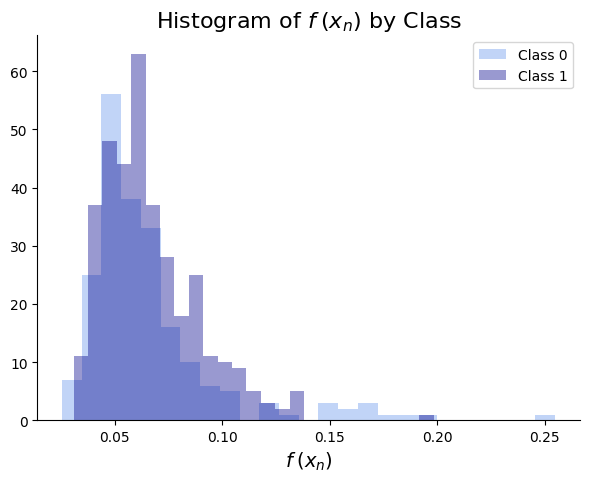

In [71]:
fig, ax = plt.subplots(figsize = (7,5))
sns.distplot(model.f[model.y == 0], bins = 25, kde = False, 
             color = 'cornflowerblue', label = 'Class 0')
sns.distplot(model.f[model.y == 1], bins = 25, kde = False, 
             color = 'darkblue', label = 'Class 1')
ax.set_xlabel(r"$f\hspace{.25}(x_n)$", size = 14)
ax.set_title(r"Histogram of $f\hspace{.25}(x_n)$ by Class", size = 16)
ax.legend()
sns.despine()

In [72]:

# import data
cancer = datasets.load_breast_cancer()
X_cancer = cancer['data']
y_cancer = cancer['target']
wine = datasets.load_wine()
X_wine = wine['data']
y_wine = wine['target']

In [76]:
from sklearn.linear_model import LogisticRegression
binary_model = LogisticRegression(C = 10**5, max_iter = 100000)
binary_model.fit(X_cancer, y_cancer)

y_hats = binary_model.predict(X_cancer)
p_hats = binary_model.predict_proba(X_cancer)
print(f'Training accuracy: {binary_model.score(X_cancer, y_cancer)}')

Training accuracy: 0.9824253075571178


In [78]:
from sklearn.linear_model import LogisticRegression
multiclass_model = LogisticRegression(multi_class = 'multinomial', C = 10**5, max_iter = 10**4)
multiclass_model.fit(X_wine, y_wine)

LogisticRegression(C=100000, max_iter=10000, multi_class='multinomial')

In [82]:
y_hats =multiclass_model.predict(X_wine)
print(multiclass_model.score(X_wine,y_wine))
print(y_hats)

1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X_cancer, y_cancer);

f0 = np.dot(X_cancer, lda.coef_[0])[y_cancer == 0]
f1 = np.dot(X_cancer, lda.coef_[0])[y_cancer == 1]
print('Separated:', (min(f0) > max(f1)) | (max(f0) < min(f1)))

Separated: False
